### Context-

A response model can provide a significant boost to the efficiency of a marketing campaign by increasing responses or reducing expenses. The objective is to predict who will respond to an offer for a product or service


# Importing importent libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

# Loading dataset

In [2]:
df=pd.read_csv("marketing_campaign.csv",sep=";")
df.head(10).style.background_gradient(cmap = "Reds_r")

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.000000,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.000000,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.000000,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.000000,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.000000,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.000000,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.000000,0,1,2012-11-13,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.000000,1,0,2013-05-08,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.000000,1,0,2013-06-06,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.000000,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


### Basic Information about columns

In [3]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

### Input Features

*__AcceptedCmp1__ - 1 if customer accepted the offer in the 1st campaign, 0 otherwise

*__AcceptedCmp2__ - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

*__AcceptedCmp3__ - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

*__AcceptedCmp4__ - 1 if customer accepted the offer in the 4th campaign, 0 otherwise

*__AcceptedCmp5__ - 1 if customer accepted the offer in the 5th campaign, 0 otherwise


*__Complain__ - 1 if customer complained in the last 2 years

*__DtCustomer__ - date of customer’s enrolment with the company

*__Education__ - customer’s level of education

*__Marital__ - customer’s marital status

*__Kidhome__ - number of small children in customer’s household

*__Teenhome__ - number of teenagers in customer’s household

*__Income__ - customer’s yearly household income


*__MntFishProducts__ - amount spent on fish products in the last 2 years

*__MntMeatProducts__ - amount spent on meat products in the last 2 years

*__MntFruits__ - amount spent on fruits products in the last 2 years

*__MntSweetProducts__ - amount spent on sweet products in the last 2 years

*__MntWines__ - amount spent on wine products in the last 2 years

*__MntGoldProds__ - amount spent on gold products in the last 2 years


*__NumDealsPurchases__ - number of purchases made with discount

*__NumCatalogPurchases__ - number of purchases made using catalogue

*__NumStorePurchases__ - number of purchases made directly in stores

*__NumWebPurchases__ - number of purchases made through company’s web site

*__NumWebVisitsMonth__ - number of visits to company’s web site in the last month

*__Recency__ - number of days since the last purchase


### Output Features


*__Response (target)__ - 1 if customer accepted the offer in the last campaign, 0 otherwise

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Descriptive Statistics

In [5]:
df.describe().T.style.background_gradient(cmap = "magma")

,count,mean,std,min,25%,50%,75%,max
ID,2240.000000,5592.159821,3246.662198,0.000000,2828.250000,5458.500000,8427.750000,11191.000000
Year_Birth,2240.000000,1968.805804,11.984069,1893.000000,1959.000000,1970.000000,1977.000000,1996.000000
Income,2216.000000,52247.251354,25173.076661,1730.000000,35303.000000,51381.500000,68522.000000,666666.000000
Kidhome,2240.000000,0.444196,0.538398,0.000000,0.000000,0.000000,1.000000,2.000000
Teenhome,2240.000000,0.506250,0.544538,0.000000,0.000000,0.000000,1.000000,2.000000
Recency,2240.000000,49.109375,28.962453,0.000000,24.000000,49.000000,74.000000,99.000000
MntWines,2240.000000,303.935714,336.597393,0.000000,23.750000,173.500000,504.250000,1493.000000
MntFruits,2240.000000,26.302232,39.773434,0.000000,1.000000,8.000000,33.000000,199.000000
MntMeatProducts,2240.000000,166.950000,225.715373,0.000000,16.000000,67.000000,232.000000,1725.000000
MntFishProducts,2240.000000,37.525446,54.628979,0.000000,3.000000,12.000000,50.000000,259.000000


# Data Cleaning

### Null values

In [6]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

#### Replecing null values in In Income column to mean value.

In [7]:
df.fillna(df["Income"].mean(),inplace=True)

### Duplicated Values

In [8]:
df.duplicated().sum()

0

# EDA

### Targate variable

In [9]:
df['Response'].unique()

array([1, 0], dtype=int64)

In [10]:
df["Response"].value_counts()

0    1906
1     334
Name: Response, dtype: int64

 It is imbalnce dataset.

### Input Variables

In [11]:
for i in range(0,len(df.columns)):
    print(df.iloc[:,[i]].value_counts())

ID   
0        1
7375     1
7348     1
7349     1
7352     1
        ..
3698     1
3697     1
3696     1
3690     1
11191    1
Length: 2240, dtype: int64
Year_Birth
1976          89
1971          87
1975          83
1972          79
1970          77
1978          77
1973          74
1965          74
1969          71
1974          69
1956          55
1958          53
1979          53
1977          52
1952          52
1959          51
1968          51
1966          50
1954          50
1955          49
1960          49
1982          45
1963          45
1962          44
1967          44
1957          43
1951          43
1983          42
1986          42
1964          42
1980          39
1981          39
1984          38
1961          36
1953          35
1985          32
1949          30
1989          30
1950          29
1988          29
1987          27
1948          21
1990          18
1947          16
1946          16
1991          15
1992          13
1945           8
1944           7
19

We can see what is frequencies of any value in every columns.

## Droping Unneccesory columns

In [12]:
df.drop("Dt_Customer",axis=1,inplace=True)
df.drop("ID",axis=1,inplace=True)

In [13]:
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,46,709,43,182,...,5,0,0,0,0,0,0,3,11,0
2236,1946,PhD,Together,64014.0,2,1,56,406,0,30,...,7,0,0,0,1,0,0,3,11,0
2237,1981,Graduation,Divorced,56981.0,0,0,91,908,48,217,...,6,0,1,0,0,0,0,3,11,0
2238,1956,Master,Together,69245.0,0,1,8,428,30,214,...,3,0,0,0,0,0,0,3,11,0


#### Heatmap for multicollinearity

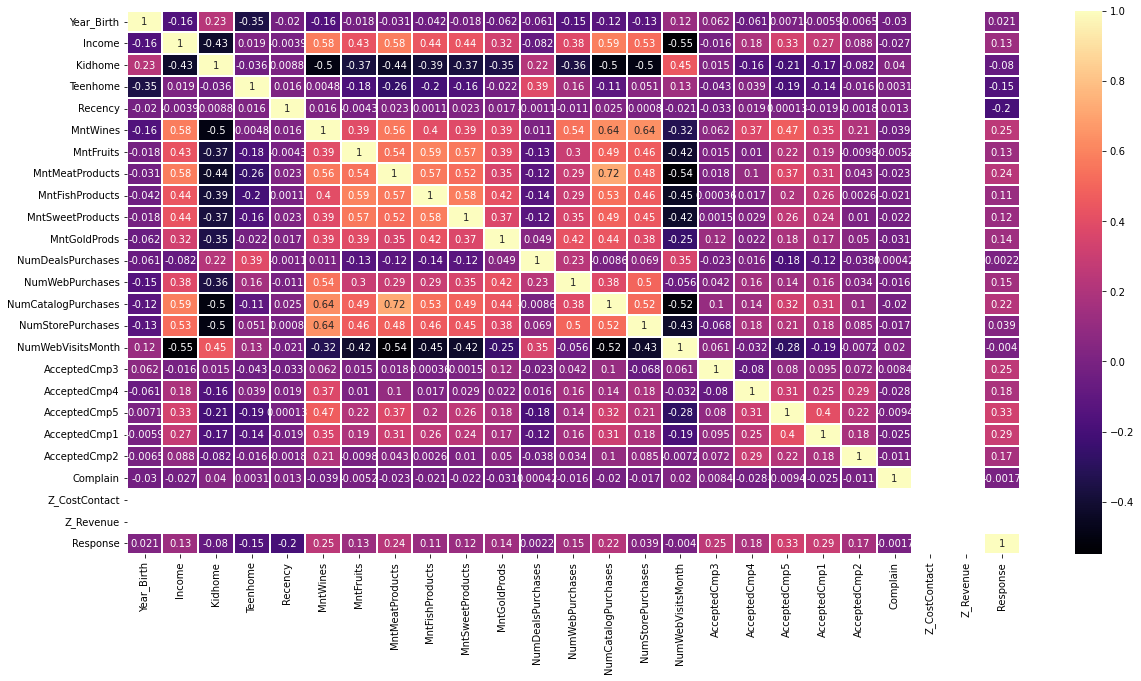

In [14]:
plt.figure(figsize = [20, 10], facecolor = 'white')
sns.heatmap(df.corr(), annot = True, linewidths = 2, cmap = "magma");

# Outliers

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


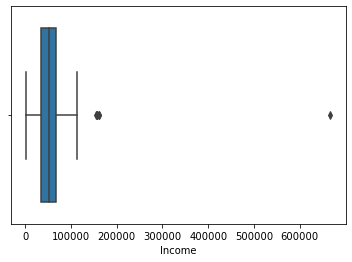

In [15]:
# In Income column
sns.boxplot(df["Income"])
plt.show()

In [16]:
df=df[df["Income"]<150000]

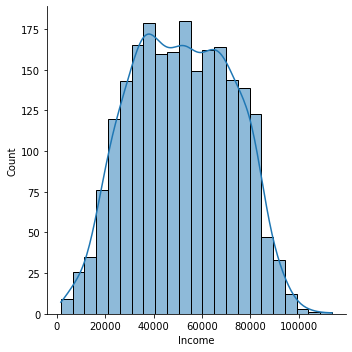

In [17]:
sns.displot(df['Income'],kde=True)
plt.show()

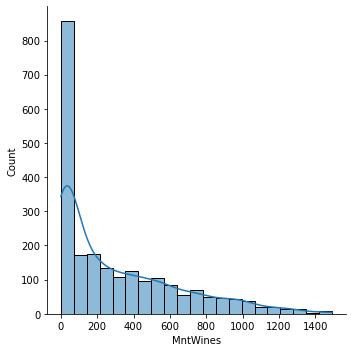

In [18]:
sns.displot(df['MntWines'],kde=True)
plt.show()

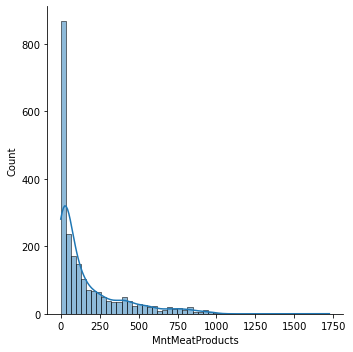

In [19]:
sns.displot(df['MntMeatProducts'],kde=True)
plt.show()

# Encoding

In [20]:
df=pd.get_dummies(df,drop_first=True)

In [21]:
df

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1957,58138.0,0,0,58,635,88,546,172,88,...,1,0,0,0,0,0,1,0,0,0
1,1954,46344.0,1,1,38,11,1,6,2,1,...,1,0,0,0,0,0,1,0,0,0
2,1965,71613.0,0,0,26,426,49,127,111,21,...,1,0,0,0,0,0,0,1,0,0
3,1984,26646.0,1,0,26,11,4,20,10,3,...,1,0,0,0,0,0,0,1,0,0
4,1981,58293.0,1,0,94,173,43,118,46,27,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,0,1,46,709,43,182,42,118,...,1,0,0,0,0,1,0,0,0,0
2236,1946,64014.0,2,1,56,406,0,30,0,0,...,0,0,1,0,0,0,0,1,0,0
2237,1981,56981.0,0,0,91,908,48,217,32,12,...,1,0,0,0,1,0,0,0,0,0
2238,1956,69245.0,0,1,8,428,30,214,80,30,...,0,1,0,0,0,0,0,1,0,0


In [22]:
df.columns

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO'],
      dtype='object')

### selecting dependent and independent columns

In [23]:
X=df.drop(['Response'],axis=1)
y=df['Response']
y

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    1
Name: Response, Length: 2232, dtype: int64

### Train Test split

In [24]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

### Feature Scaling

In [25]:

sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# use of LazyPredict

In [27]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None)

models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:04<00:00,  6.53it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
QuadraticDiscriminantAnalysis      0.74               0.71     0.71      0.77   
Perceptron                         0.83               0.71     0.71      0.83   
XGBClassifier                      0.88               0.70     0.70      0.87   
PassiveAggressiveClassifier        0.83               0.69     0.69      0.84   
LogisticRegression                 0.88               0.68     0.68      0.87   
LGBMClassifier                     0.88               0.68     0.68      0.87   
SGDClassifier                      0.84               0.68     0.68      0.84   
NearestCentroid                    0.74               0.68     0.68      0.77   
LinearSVC                          0.88               0.68     0.68      0.86   
AdaBoostClassifier                 0.88               0.67     0.67      0.86   
BernoulliNB                 

## 1. Logistic Regression

In [26]:

model1=LogisticRegression()
model1.fit(X_train,y_train)

train_pred1=model1.predict(X_train) #train prediction
test_pred1=model1.predict(X_test)   #test prediction

print("Train Accuracy - ",accuracy_score(y_train,train_pred1))
print("Test Accuracy - ",accuracy_score(y_test,test_pred1))

Train Accuracy -  0.9026888604353394
Test Accuracy -  0.8835820895522388


### Performance Metrics

In [27]:
confusion_matrix(y_test,test_pred1)

array([[551,  16],
       [ 62,  41]], dtype=int64)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


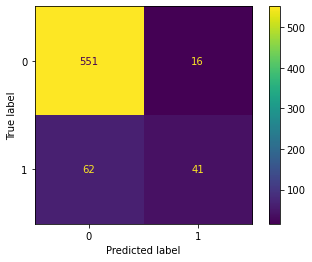

In [28]:
plot_confusion_matrix(model1,X_test,y_test)

In [29]:
print(classification_report(y_test,test_pred1))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       567
           1       0.72      0.40      0.51       103

    accuracy                           0.88       670
   macro avg       0.81      0.68      0.72       670
weighted avg       0.87      0.88      0.87       670



### Hyperparameter Tunning

In [30]:

est=LogisticRegression()
par = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

esc=GridSearchCV(est,par,cv=5)
esc.fit(X_train,y_train)

esc.best_params_

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

{'max_iter': 100, 'penalty': 'none', 'solver': 'lbfgs'}

### Using the best parameters and creating new model

In [31]:
model1h=LogisticRegression(max_iter=100, penalty='none', solver='lbfgs')
model1h.fit(X_train,y_train)

train_pred1h=model1h.predict(X_train) #train prediction
test_pred1h=model1h.predict(X_test)   #test prediction

print("Train Accuracy - ",accuracy_score(y_train,train_pred1h))
print("Test Accuracy - ",accuracy_score(y_test,test_pred1h))

Train Accuracy -  0.9033290653008963
Test Accuracy -  0.8820895522388059


### Performance matrics using best parameter

[[550  17]
 [ 62  41]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       567
           1       0.71      0.40      0.51       103

    accuracy                           0.88       670
   macro avg       0.80      0.68      0.72       670
weighted avg       0.87      0.88      0.87       670



C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


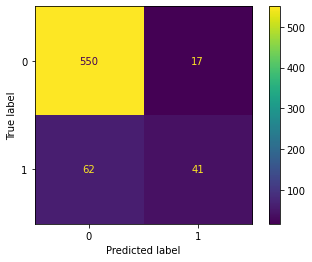

In [33]:
print(confusion_matrix(y_test,test_pred1h))
print(classification_report(y_test,test_pred1h))
plot_confusion_matrix(model1h,X_test,y_test)

__Observation:__  

    Before Hyperparameter tunning test accuracy : 88.36%
    
    After Hyperparameter tunning test accuracy : 88.21%
    
    but we increase the precision of Response(1) from 0.70 to 0.71

## 2. KNN Classifier

In [34]:

model2=KNeighborsClassifier()
model2.fit(X_train,y_train)

train_pred2=model2.predict(X_train) #train prediction
test_pred2=model2.predict(X_test)   #test prediction

print("Train Accuracy - ",accuracy_score(y_train,train_pred2))
print("Test Accuracy - ",accuracy_score(y_test,test_pred2))

Train Accuracy -  0.9046094750320103
Test Accuracy -  0.8477611940298507


### Preformance matrics

[[548  19]
 [ 83  20]]


C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.87      0.97      0.91       567
           1       0.51      0.19      0.28       103

    accuracy                           0.85       670
   macro avg       0.69      0.58      0.60       670
weighted avg       0.81      0.85      0.82       670



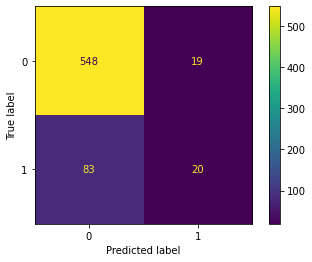

In [38]:
print(confusion_matrix(y_test,test_pred2))
plot_confusion_matrix(model2,X_test,y_test)
print(classification_report(y_test,test_pred2))


### Hyperparameter Tunning

In [39]:
est=KNeighborsClassifier()
par={'n_neighbors':list(range(1,31)),
    "p":[1,2]}

esc=GridSearchCV(est,par,cv=5)
esc.fit(X_train,y_train)

esc.best_params_

{'n_neighbors': 5, 'p': 1}

### Using the best parameters and creating new model

In [40]:
model2h=KNeighborsClassifier(n_neighbors=5, p=1)
model2h.fit(X_train,y_train)

train_pred2h=model2h.predict(X_train) #train prediction
test_pred2h=model2h.predict(X_test)   #test prediction

print("Train Accuracy - ",accuracy_score(y_train,train_pred2h))
print("Test Accuracy - ",accuracy_score(y_test,test_pred2h))

Train Accuracy -  0.8982074263764405
Test Accuracy -  0.8537313432835821


### Performance matrics using best parameter

[[552  15]
 [ 83  20]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       567
           1       0.57      0.19      0.29       103

    accuracy                           0.85       670
   macro avg       0.72      0.58      0.60       670
weighted avg       0.82      0.85      0.82       670



C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


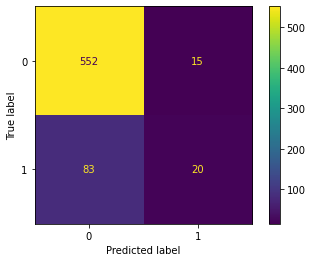

In [41]:
print(confusion_matrix(y_test,test_pred2h))
print(classification_report(y_test,test_pred2h))
plot_confusion_matrix(model2h,X_test,y_test)

__Observation:__  

    Before Hyperparameter tunning test accuracy : __84.78%__
    
    After Hyperparameter tunning test accuracy : __85.37%__
    
    but we increase the precision of Response(1) from 0.51 to 0.57

## 3. Support Vector Classifier

In [49]:

model3=SVC()
model3.fit(X_train,y_train)

train_pred3=model3.predict(X_train) #train prediction
test_pred3=model3.predict(X_test)   #test prediction

print("Train Accuracy - ",accuracy_score(y_train,train_pred3))
print("Test Accuracy - ",accuracy_score(y_test,test_pred3))

Train Accuracy -  0.9289372599231754
Test Accuracy -  0.8656716417910447


### Performance Matrics

[[549  18]
 [ 72  31]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       567
           1       0.63      0.30      0.41       103

    accuracy                           0.87       670
   macro avg       0.76      0.63      0.67       670
weighted avg       0.85      0.87      0.84       670



C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


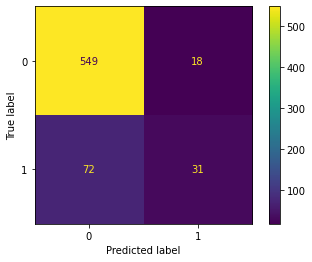

In [50]:
print(confusion_matrix(y_test,test_pred3))
plot_confusion_matrix(model3,X_test,y_test)
print(classification_report(y_test,test_pred3))


### Hyperparameter Tunning

In [51]:
est=SVC()
par= {'C':[1.5,1.6,2,2.5],
       'kernel':["linear","rbf"],
       'gamma':[0.1,0.5,0.6,1]}

esc=GridSearchCV(est,par,cv=5)
esc.fit(X_train,y_train)

esc.best_params_

{'C': 1.5, 'gamma': 0.1, 'kernel': 'linear'}

### Using the best parameters and creating new model

In [52]:
model3h=SVC(C=1.5, gamma= 0.1, kernel= 'linear')
model3h.fit(X_train,y_train)

train_pred3h=model3h.predict(X_train) #train prediction
test_pred3h=model3h.predict(X_test)   #test prediction

print("Train Accuracy - ",accuracy_score(y_train,train_pred3h))
print("Test Accuracy - ",accuracy_score(y_test,test_pred3h))

Train Accuracy -  0.9020486555697823
Test Accuracy -  0.8791044776119403


### Performance matrics using best parameter

[[548  19]
 [ 62  41]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       567
           1       0.68      0.40      0.50       103

    accuracy                           0.88       670
   macro avg       0.79      0.68      0.72       670
weighted avg       0.87      0.88      0.87       670



C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


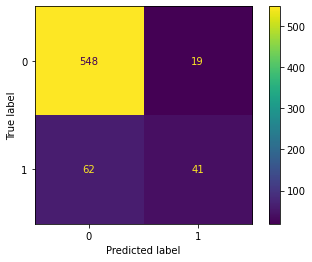

In [53]:
print(confusion_matrix(y_test,test_pred3h))
plot_confusion_matrix(model3h,X_test,y_test)
print(classification_report(y_test,test_pred3h))


__Observation:__  

    Before Hyperparameter tunning test accuracy : 86.57%
    
    After Hyperparameter tunning test accuracy : 87.91%
    
    but we increase the precision of Response(0) from 0.88 to 0.90
    and increase the precision of Response(1) from 0.63 to 0.68
    and increase the recall of Response(1) from 0.30 to 0.40

## 4. Decision tree Classifier

In [54]:

model4=DecisionTreeClassifier()
model4.fit(X_train,y_train)

train_pred4=model4.predict(X_train) #train prediction
test_pred4=model4.predict(X_test)  #test prediction

print("Train Accuracy - ",accuracy_score(y_train,train_pred4))
print("Test Accuracy - ",accuracy_score(y_test,test_pred4))

Train Accuracy -  0.9935979513444302
Test Accuracy -  0.8477611940298507


### Performance Matrics

[[520  47]
 [ 55  48]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       567
           1       0.51      0.47      0.48       103

    accuracy                           0.85       670
   macro avg       0.70      0.69      0.70       670
weighted avg       0.84      0.85      0.85       670



C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


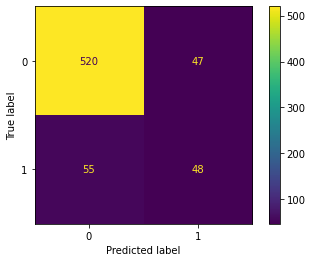

In [55]:
print(confusion_matrix(y_test,test_pred4))
plot_confusion_matrix(model4,X_test,y_test)
print(classification_report(y_test,test_pred4))

### Hyperparameter tunning

In [56]:
est=DecisionTreeClassifier()

par = {'splitter' : ['best', 'random'],
'criterion' : ['gini', 'entropy'],
'max_depth': [4,5,6,7,8],
'min_samples_split': [4,5,6,7,8,9,10],
'min_samples_leaf': [3,4,5,6,7,8,9,10]
}

esc=GridSearchCV(est,par,cv=5)
esc.fit(X_train,y_train)

esc.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'splitter': 'random'}

### Using the best parameters and creating new model

In [57]:
model4h=DecisionTreeClassifier(criterion= 'gini',
 max_depth= 4,
 min_samples_leaf= 8,
 min_samples_split= 8,
 splitter='random')
model4h.fit(X_train,y_train)

train_pred4h=model4h.predict(X_train) #train prediction
test_pred4h=model4h.predict(X_test)  #test prediction

print("Train Accuracy - ",accuracy_score(y_train,train_pred4h))
print("Test Accuracy - ",accuracy_score(y_test,test_pred4h))

Train Accuracy -  0.8866837387964148
Test Accuracy -  0.8402985074626865


### Decision Tree Visualization

[Text(0.5431034482758621, 0.9, 'X[18] <= 3.199\ngini = 0.252\nsamples = 1562\nvalue = [1331, 231]'),
 Text(0.27586206896551724, 0.7, 'X[16] <= 1.008\ngini = 0.198\nsamples = 1446\nvalue = [1285, 161]'),
 Text(0.13793103448275862, 0.5, 'X[19] <= 2.22\ngini = 0.159\nsamples = 1353\nvalue = [1235, 118]'),
 Text(0.06896551724137931, 0.3, 'X[31] <= 0.938\ngini = 0.143\nsamples = 1301\nvalue = [1200, 101]'),
 Text(0.034482758620689655, 0.1, 'gini = 0.12\nsamples = 1014\nvalue = [949, 65]'),
 Text(0.10344827586206896, 0.1, 'gini = 0.219\nsamples = 287\nvalue = [251, 36]'),
 Text(0.20689655172413793, 0.3, 'X[4] <= 0.425\ngini = 0.44\nsamples = 52\nvalue = [35, 17]'),
 Text(0.1724137931034483, 0.1, 'gini = 0.498\nsamples = 30\nvalue = [14, 16]'),
 Text(0.2413793103448276, 0.1, 'gini = 0.087\nsamples = 22\nvalue = [21, 1]'),
 Text(0.41379310344827586, 0.5, 'X[6] <= -0.034\ngini = 0.497\nsamples = 93\nvalue = [50, 43]'),
 Text(0.3448275862068966, 0.3, 'X[31] <= 0.252\ngini = 0.482\nsamples = 69\n

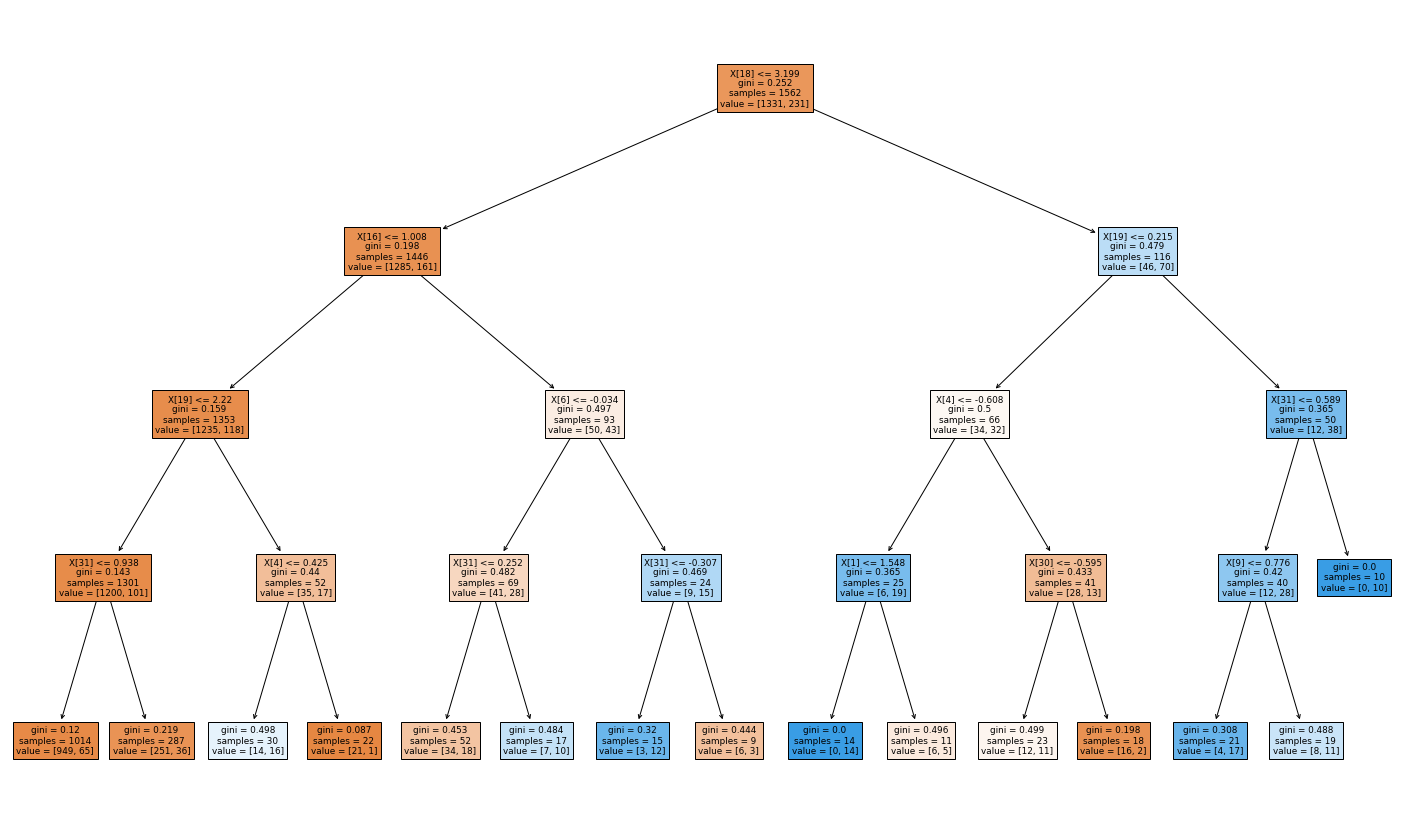

In [60]:
#With Hyperparameter Tunning
from sklearn import tree
fig = plt.figure(figsize=(25,15))
tree.plot_tree(model4h,filled = True)

[Text(0.7446906242561295, 0.9736842105263158, 'X[18] <= 1.624\ngini = 0.252\nsamples = 1562\nvalue = [1331, 231]'),
 Text(0.591261753154011, 0.9210526315789473, 'X[16] <= 1.669\ngini = 0.198\nsamples = 1446\nvalue = [1285, 161]'),
 Text(0.43722476791240183, 0.868421052631579, 'X[4] <= -1.009\ngini = 0.159\nsamples = 1353\nvalue = [1235, 118]'),
 Text(0.28564627469650083, 0.8157894736842105, 'X[19] <= 1.708\ngini = 0.323\nsamples = 281\nvalue = [224, 57]'),
 Text(0.25136872173292074, 0.7631578947368421, 'X[15] <= 1.341\ngini = 0.292\nsamples = 270\nvalue = [222, 48]'),
 Text(0.21328255177338729, 0.7105263157894737, 'X[7] <= 1.908\ngini = 0.261\nsamples = 259\nvalue = [219, 40]'),
 Text(0.18281361580576053, 0.6578947368421053, 'X[11] <= 1.2\ngini = 0.236\nsamples = 249\nvalue = [215, 34]'),
 Text(0.15234467983813377, 0.6052631578947368, 'X[1] <= 1.409\ngini = 0.191\nsamples = 224\nvalue = [200, 24]'),
 Text(0.1371102118543204, 0.5526315789473685, 'X[20] <= 4.577\ngini = 0.174\nsamples = 

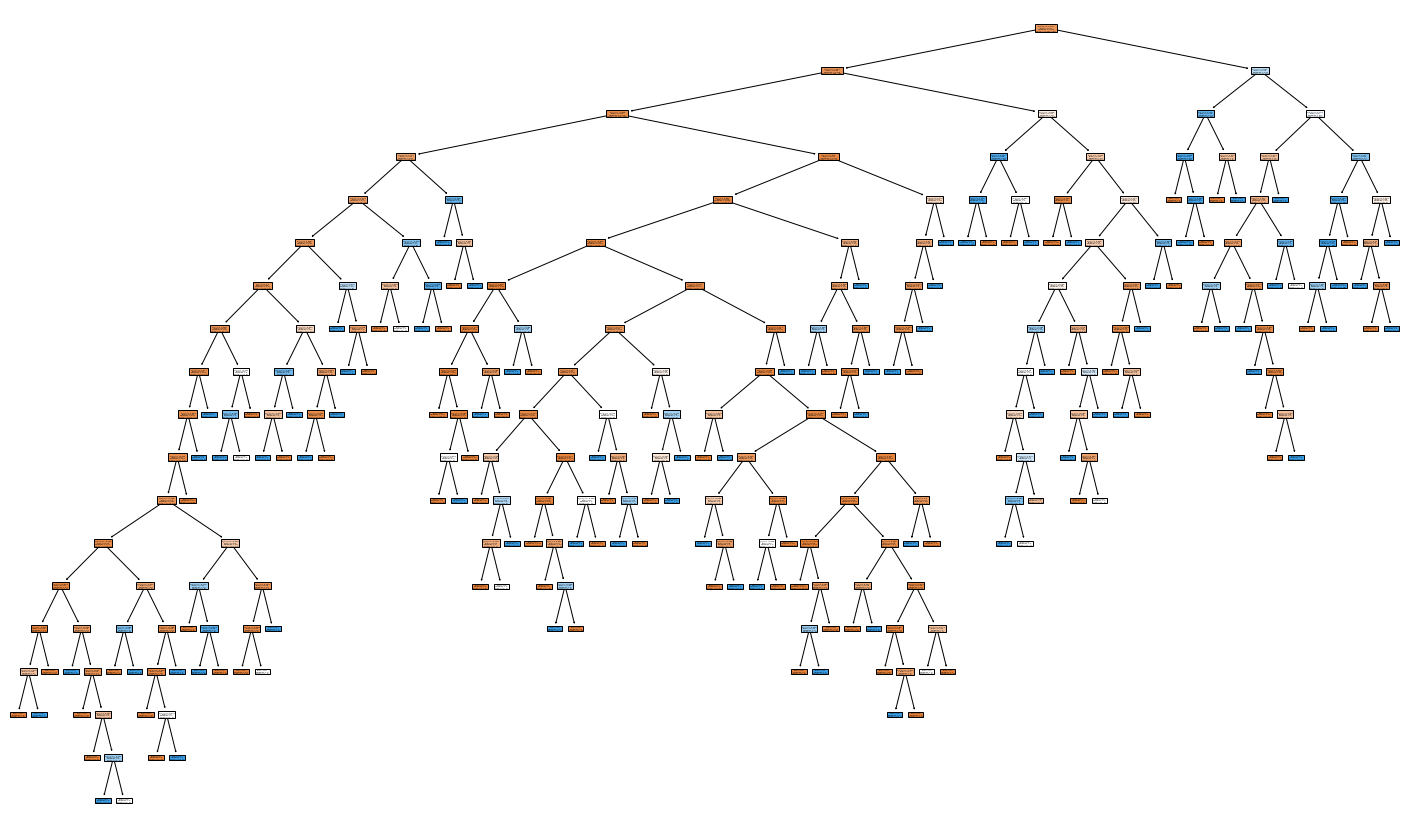

In [61]:
#Without Hyperparameter Tunning
from sklearn import tree
fig = plt.figure(figsize=(25,15))
tree.plot_tree(model4,filled = True)

In [62]:
fig.savefig("decision tree ")

### Performance matrics using best parameter

[[540  27]
 [ 80  23]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       567
           1       0.46      0.22      0.30       103

    accuracy                           0.84       670
   macro avg       0.67      0.59      0.61       670
weighted avg       0.81      0.84      0.82       670



C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


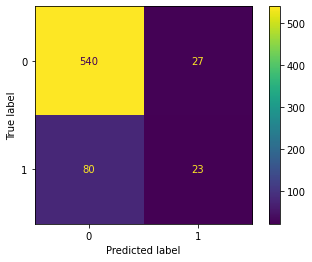

In [63]:
print(confusion_matrix(y_test,test_pred4h))
plot_confusion_matrix(model4h,X_test,y_test)
print(classification_report(y_test,test_pred4h))

__Observation:__  

    Before Hyperparameter tunning test accuracy : 84.78% with overfitting
    
    After Hyperparameter tunning test accuracy : 84.02% without overfitting
    
    
    
    but we decrease the precision of Response(0) from 0.90 to 0.87
    and decrease the precision of Response(1) from 0.51 to 0.46
    and increase the recall of Response(0) from 0.92 to 0.95
    and decrease the recall of Response(1) from 0.47 to 0.22

## Random Forest classifier

In [26]:

model5=RandomForestClassifier()
model5.fit(X_train,y_train)

train_pred5=model5.predict(X_train) #train prediction
test_pred5=model5.predict(X_test)   #test prediction

print("Train Accuracy - ",accuracy_score(y_train,train_pred5))
print("Test Accuracy - ",accuracy_score(y_test,test_pred5))

Train Accuracy -  0.9935979513444302
Test Accuracy -  0.8746268656716418


### Performance Matrics

[[556  11]
 [ 73  30]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       567
           1       0.73      0.29      0.42       103

    accuracy                           0.87       670
   macro avg       0.81      0.64      0.67       670
weighted avg       0.86      0.87      0.85       670



C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


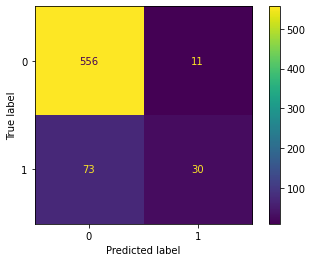

In [27]:
print(confusion_matrix(y_test,test_pred5))
plot_confusion_matrix(model5,X_test,y_test)
print(classification_report(y_test,test_pred5))

### Hyperparameter Tunning

In [28]:
est=RandomForestClassifier()
par = {
    'n_estimators':list(range(1,51)),
    "criterion" : ['gini' , 'entropy'],
    'max_depth': [5,6,7]
}

esc=GridSearchCV(est,par,cv=5)
esc.fit(X_train,y_train)

esc.best_params_

{'criterion': 'gini', 'max_depth': 6, 'n_estimators': 25}

### Using the best parameters and creating new model

In [29]:
model5h=RandomForestClassifier(criterion='gini', max_depth= 6, n_estimators= 25)
model5h.fit(X_train,y_train)

train_pred5h=model5h.predict(X_train) #train prediction
test_pred5h=model5h.predict(X_test)   #test prediction

print("Train Accuracy - ",accuracy_score(y_train,train_pred5h))
print("Test Accuracy - ",accuracy_score(y_test,test_pred5h))

Train Accuracy -  0.9154929577464789
Test Accuracy -  0.8761194029850746


### Performance matrics using best parameter

[[567   0]
 [ 83  20]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       567
           1       1.00      0.19      0.33       103

    accuracy                           0.88       670
   macro avg       0.94      0.60      0.63       670
weighted avg       0.89      0.88      0.84       670



C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


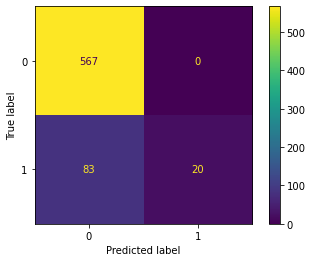

In [30]:
print(confusion_matrix(y_test,test_pred5h))
plot_confusion_matrix(model5h,X_test,y_test)
print(classification_report(y_test,test_pred5h))

__Observation:__  

    Before Hyperparameter tunning test accuracy : 87.46% with overfitting
    
    After Hyperparameter tunning test accuracy : 87.61% without overfitting
    
    
    
    but we decrease the precision of Response(0) from 0.88 to 0.87
    and increase the precision of Response(1) from 0.73 to 1.00
    and increase the recall of Response(0) from 0.98 to 1.00
    and decrease the recall of Response(1) from 0.29 to 0.19

# Bagging 

In [31]:

from sklearn.ensemble import BaggingClassifier


bagging_model_svc = BaggingClassifier(base_estimator =SVC(),n_estimators = 50,random_state = 0).fit(X_train,y_train)
y_pred_bagging = bagging_model_svc.predict(X_test)

### Performance matrics of bagging

In [32]:
# Metrics
score = accuracy_score(y_test,y_pred_bagging)
cr = classification_report(y_test,y_pred_bagging)

print("Bagging Classifier SVC")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Bagging Classifier SVC
Accuracy Score value: 0.8657
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       567
           1       0.64      0.28      0.39       103

    accuracy                           0.87       670
   macro avg       0.76      0.63      0.66       670
weighted avg       0.85      0.87      0.84       670



__Objervation__:

The accuracy of bagging model with Support vector classifier(SVC) is 86.57.

The presicision is - 

                    0 - 0.88,
                    
                    1 - 0.64

The Recall is -

                    0 - 0.97,
                    
                    1 - 0.28
                    

# Boosting

## Adaboost

In [26]:

model6=AdaBoostClassifier()
model6.fit(X_train,y_train)

train_pred6=model6.predict(X_train) #train prediction
test_pred6=model6.predict(X_test)   #test prediction

print("Train Accuracy - ",accuracy_score(y_train,train_pred6))
print("Test Accuracy - ",accuracy_score(y_test,test_pred6))

Train Accuracy -  0.91101152368758
Test Accuracy -  0.8761194029850746


### Performance matrics 

[[548  19]
 [ 64  39]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       567
           1       0.67      0.38      0.48       103

    accuracy                           0.88       670
   macro avg       0.78      0.67      0.71       670
weighted avg       0.86      0.88      0.86       670



C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


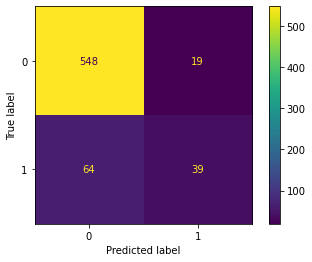

In [27]:
print(confusion_matrix(y_test,test_pred6))
plot_confusion_matrix(model6,X_test,y_test)
print(classification_report(y_test,test_pred6))

### Hyperprameter tunning

In [28]:
est=AdaBoostClassifier()
par = {
    'n_estimators':list(range(1,100)),
    "learning_rate":[0.001,0.01,0.1,0.005,0.05]
}

esc=GridSearchCV(est,par,cv=5)
esc.fit(X_train,y_train)

esc.best_params_

{'learning_rate': 0.1, 'n_estimators': 96}

### Best model using Hyperparameter Tunning

In [29]:

model6h=AdaBoostClassifier(learning_rate= 0.1, n_estimators= 96)
model6h.fit(X_train,y_train)

train_pred6h=model6h.predict(X_train) #train prediction
test_pred6h=model6h.predict(X_test)   #test prediction

print("Train Accuracy - ",accuracy_score(y_train,train_pred6h))
print("Test Accuracy - ",accuracy_score(y_test,test_pred6h))

Train Accuracy -  0.8866837387964148
Test Accuracy -  0.8686567164179104


### Performance Matrics of using best hyperparameter model

[[564   3]
 [ 85  18]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       567
           1       0.86      0.17      0.29       103

    accuracy                           0.87       670
   macro avg       0.86      0.58      0.61       670
weighted avg       0.87      0.87      0.83       670



C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


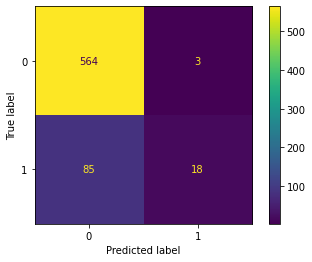

In [30]:
print(confusion_matrix(y_test,test_pred6h))
plot_confusion_matrix(model6h,X_test,y_test)
print(classification_report(y_test,test_pred6h))

__Observation:__  

    Before Hyperparameter tunning test accuracy : 87.61% without overfitting
    
    After Hyperparameter tunning test accuracy : 86.86% without overfitting
    
    
    
    but we decrease the precision of Response(0) from 0.90 to 0.87
    and increase the precision of Response(1) from 0.67 to 0.86
    and increase the recall of Response(0) from 0.97 to 0.
    and decrease the recall of Response(1) from 0.38 to 0.17

## Gradient Boost


In [26]:

model7=GradientBoostingClassifier(random_state=10)
model7.fit(X_train,y_train)

train_pred7=model7.predict(X_train) #train prediction
test_pred7=model7.predict(X_test)   #test prediction

print("Train Accuracy - ",accuracy_score(y_train,train_pred7))
print("Test Accuracy - ",accuracy_score(y_test,test_pred7))

Train Accuracy -  0.9545454545454546
Test Accuracy -  0.8805970149253731


### Performance matrics 

[[552  15]
 [ 65  38]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       567
           1       0.72      0.37      0.49       103

    accuracy                           0.88       670
   macro avg       0.81      0.67      0.71       670
weighted avg       0.87      0.88      0.86       670



C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


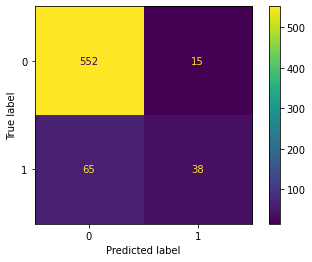

In [27]:
print(confusion_matrix(y_test,test_pred7))
plot_confusion_matrix(model7,X_test,y_test)
print(classification_report(y_test,test_pred7))

### Hyperprameter tunning

In [38]:
est=GradientBoostingClassifier()
par = {
    'n_estimators':list(range(1,51)),
    "learning_rate":[0.5,0.01,0.1],
    "max_depth" : [4,5,6]
}
esc=GridSearchCV(est,par,cv=5)
esc.fit(X_train,y_train)

esc.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 25}

### Best model using Hyperparamter tunning

In [40]:

model7h=GradientBoostingClassifier(random_state=10,n_estimators=25,learning_rate=0.1,max_depth=3)
model7h.fit(X_train,y_train)

train_pred7h=model7h.predict(X_train) #train prediction
test_pred7h=model7h.predict(X_test)   #test prediction

print("Train Accuracy - ",accuracy_score(y_train,train_pred7h))
print("Test Accuracy - ",accuracy_score(y_test,test_pred7h))

Train Accuracy -  0.9090909090909091
Test Accuracy -  0.8716417910447761


### Performance Matrics using best parameter model

[[558   9]
 [ 77  26]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       567
           1       0.74      0.25      0.38       103

    accuracy                           0.87       670
   macro avg       0.81      0.62      0.65       670
weighted avg       0.86      0.87      0.84       670



C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


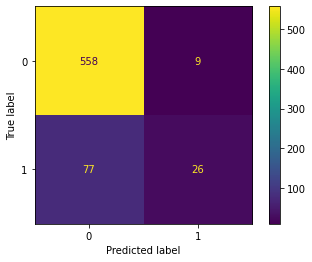

In [41]:
print(confusion_matrix(y_test,test_pred7h))
plot_confusion_matrix(model7h,X_test,y_test)
print(classification_report(y_test,test_pred7h))

__Observation:__  

    Before Hyperparameter tunning test accuracy : 88.05% with overfitting
    
    After Hyperparameter tunning test accuracy : 87.16% withot overfitting
    
    
    
    but we decrease the precision of Response(0) from 0.89 to 0.88
    and increase the precision of Response(1) from 0.72 to 0.74
    and increase the recall of Response(0) from 0.97 to 0.98
    and decrease the recall of Response(1) from 0.37 to 0.25

## XGBoost

In [42]:

model8=XGBClassifier()
model8.fit(X_train,y_train)

train_pred8=model8.predict(X_train) #train prediction
test_pred8=model8.predict(X_test)   #test prediction

print("Train Accuracy - ",accuracy_score(y_train,train_pred8))
print("Test Accuracy - ",accuracy_score(y_test,test_pred8))

Train Accuracy -  0.9935979513444302
Test Accuracy -  0.8835820895522388


### Performnace Matrics

[[547  20]
 [ 58  45]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       567
           1       0.69      0.44      0.54       103

    accuracy                           0.88       670
   macro avg       0.80      0.70      0.73       670
weighted avg       0.87      0.88      0.87       670



C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


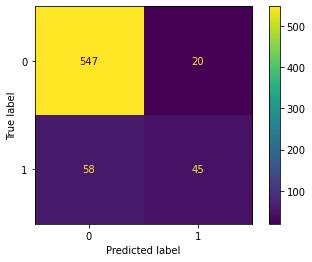

In [43]:
print(confusion_matrix(y_test,test_pred8))
plot_confusion_matrix(model8,X_test,y_test)
print(classification_report(y_test,test_pred8))

### Hyperparameter Tunning

In [46]:
est=XGBClassifier()
par={'n_estimators':list(range(1,51)),
    'learning_rate':[0.1,0.3,1],
    'max_depth':[2,4,5,6]}

esc=GridSearchCV(est,par,cv=5)
esc.fit(X_train,y_train)

esc.best_params_

{'learning_rate': 1, 'max_depth': 2, 'n_estimators': 8}

### Best model using hyperparameter tunning

In [48]:
model8h=XGBClassifier(learning_rate= 1, max_depth= 2, n_estimators= 8)
model8h.fit(X_train,y_train)

train_pred8h=model8h.predict(X_train) #train prediction
test_pred8h=model8h.predict(X_test)   #test prediction

print("Train Accuracy - ",accuracy_score(y_train,train_pred8h))
print("Test Accuracy - ",accuracy_score(y_test,test_pred8h))

Train Accuracy -  0.9090909090909091
Test Accuracy -  0.8701492537313433


### Performance matrics using best hyperparameter

[[551  16]
 [ 71  32]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       567
           1       0.67      0.31      0.42       103

    accuracy                           0.87       670
   macro avg       0.78      0.64      0.68       670
weighted avg       0.85      0.87      0.85       670



C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


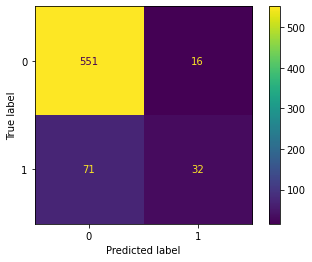

In [49]:
print(confusion_matrix(y_test,test_pred8h))
plot_confusion_matrix(model8h,X_test,y_test)
print(classification_report(y_test,test_pred8h))

__Observation:__  

    Before Hyperparameter tunning test accuracy : 88.35% with overfitting
    
    After Hyperparameter tunning test accuracy : 87.01% withot overfitting
    
    
    
    but we decrease the precision of Response(0) from 0.90 to 0.89
    and decrease the precision of Response(1) from 0.69 to 0.67
    and increase the recall of Response(0) from 0.96 to 0.97
    and decrease the recall of Response(1) from 0.44 to 0.31

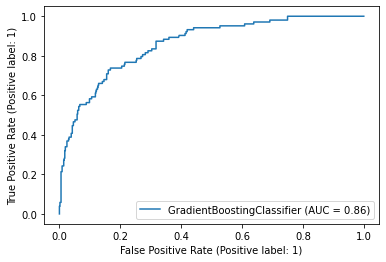

In [55]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model7,X_test,y_test)

In [58]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,test_pred7)

0.6712385061899625